# Beta Correction to the Dicke Narrowing

M. Konefał, M. Słowiński, M. Zaborowski, R. Ciuryło, D. Lisak, P. Wcisło, Analytical-function correction to the Hartmann–Tran profile for more reliable representation of the Dicke-narrowed molecular spectra, Journal of Quantitative Spectroscopy and Radiative Transfer, Volume 242, 2020,106784,ISSN 0022-4073, https://doi.org/10.1016/j.jqsrt.2019.106784.

Dicke narrowing accounts for effective narrowing of the doppler width due velocity changing collisions.  The magnitude of this effect is dependent on the hardness of the collisions.  Different line shapes make different assumptions on the hardness of the collision with the Nelkhin-Ghatak making the assumption that collisions are hard, meaning that the the molecular velocity before a collision are forgotten after the collision, and  the Galatry profile assuming collisions are soft, meaning that many collisions are necessary to change the velocity. In reality, the hardness of the collision is related to the perturbers and absorbers being studied.  In the paper above, authors map the hard Dicke Narrowing term onto the billiard ball colision model, based on a parameter beta, which is related to the pressure and the ratio of the masses between the perturber and absorber.  As Beta can be calculated, this correction provides a more robust modeling of the Dicke Narrowing without the addition of additional floated parameters. 

The Beta correction has been included in the MATS software and the following example provides an example of how to use it. 

In [1]:
# Load Necessary Packages

import numpy as np
import pandas as pd
import qgrid
import os, sys
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

sys.path.append(r'C:\Users\ema3\Documents\MATS\MATS')# set location of HAPI.py module

from MATS import *



HAPI version: 1.1.0.9.6
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


Synthetic Air Samples


C:\Users\ema3\Documents\MATS\MATS\Fit_Dataset.py:364: RuntimeWarning: divide by zero encountered in log10
  linelist['Beta'] = linelist['A'].values*np.tanh(linelist['B'].values * np.log10(linelist['Chi'].values) + linelist['C'].values) + linelist['D'].values


Mixture Samples
You are using the 'self' term, consider explicitly labeling the broadener (ie in an oxygen spectra use 'O2' instead of 'self').  This may avoid confusion in multiple species fits. For single species fits it should not matter.
Double check that you did not include the equivalent of the self term explicitly (ie in an oxygen spectra having both 'O2' and 'self').
You are using the 'self' term, consider explicitly labeling the broadener (ie in an oxygen spectra use 'O2' instead of 'self').  This may avoid confusion in multiple species fits. For single species fits it should not matter.
Double check that you did not include the equivalent of the self term explicitly (ie in an oxygen spectra having both 'O2' and 'self').
You are using the 'self' term, consider explicitly labeling the broadener (ie in an oxygen spectra use 'O2' instead of 'self').  This may avoid confusion in multiple species fits. For single species fits it should not matter.
Double check that you did not incl

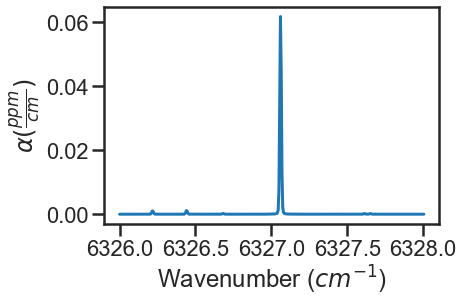

In [2]:
#Simulate Spectra including with Beta.  

path = r'C:\Users\ema3\Documents\MATS\MATS\Examples\CO2 - Beta Parameterization'
os.chdir(path)

#Generic Fit Parameters
wave_range = 1.5 #range outside of experimental x-range to simulate
IntensityThreshold = 1e-30 #intensities must be above this value to be simulated
Fit_Intensity = 1e-25 #intensities must be above this value for the line to be fit
order_baseline_fit = 1
wave_min = 6326 #cm-1
wave_max = 6328 #cm-1
wave_space = 0.005 #cm-1
baseline_terms = [0] #polynomial baseline coefficients where the index is equal to the coefficient order
etalon = {}

#Read in Possible linelists
hapi = r'C:\Users\ema3\Documents\MATS\MATS\Linelists'
os.chdir(hapi)
##Adjust the linelist before simualting spectra
PARAM_LINELIST = pd.read_csv('CO2_30012_NIST.csv')
PARAM_LINELIST.loc[(PARAM_LINELIST['sw'] > Fit_Intensity)& (PARAM_LINELIST['local_iso_id'] == 1) & (PARAM_LINELIST['molec_id'] == 2), 'nuVC_air'] = 0.018596 
PARAM_LINELIST.loc[(PARAM_LINELIST['sw'] > Fit_Intensity) & (PARAM_LINELIST['local_iso_id'] == 1) & (PARAM_LINELIST['molec_id'] == 2), 'nuVC_self'] = 0.01993
PARAM_LINELIST.loc[(PARAM_LINELIST['sw'] > Fit_Intensity) & (PARAM_LINELIST['local_iso_id'] == 1) & (PARAM_LINELIST['molec_id'] == 2), 'y_self_296'] = 0
PARAM_LINELIST.loc[(PARAM_LINELIST['sw'] > Fit_Intensity) & (PARAM_LINELIST['local_iso_id'] == 1) & (PARAM_LINELIST['molec_id'] == 2), 'y_air_296'] = 0

os.chdir(path)
#Error Sources
##SNR
SNR = 20000

## Wavenumber - adds gaussian noise of given absolute magniturewing_wavenumbers = 25, wing_method = 'wing_cutoff'
wave_error = 0


#Synthetic Air Simulation
print ('Synthetic Air Samples')
spec_1 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 5, diluent = 'air',
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers',  molefraction = {2 :400*1e-6}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_2 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 20, diluent = 'air',
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers',  molefraction = {2 :400*1e-6}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_3 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 100, diluent = 'air',
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers', molefraction = {2 :400*1e-6}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_4 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 200, diluent = 'air',
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers', molefraction = {2 :400*1e-6}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_5 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 400, diluent = 'air',
                       wing_cutoff = 25, wing_method = 'wing_wavenumbers',  molefraction = {2 :400*1e-6}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
#Mixture of CO2 and Air
## Note that we had to use the Diluent method opposedc to the diluent method.  Additionally, the use of the self broadening term will generate some warnings
print ('Mixture Samples')
spec_6 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 5, Diluent = {'self':{'composition':0.05, 'm':43.98983} , 'air' :{'composition':0.95, 'm':28.95734}},
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers',  molefraction = {2 :0.05}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_7=  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 20, Diluent = {'self':{'composition':0.05, 'm':43.98983} , 'air' :{'composition':0.95, 'm':28.95734}},
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers',  molefraction = {2 :0.05}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_8 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 100, Diluent = {'self':{'composition':0.05, 'm':43.98983} , 'air' :{'composition':0.95, 'm':28.95734}},
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers',  molefraction = {2 :0.05}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_9 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 200, Diluent = {'self':{'composition':0.05, 'm':43.98983} , 'air' :{'composition':0.95, 'm':28.95734}}, 
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers', molefraction = {2 :0.05}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_10 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 400, Diluent = {'self':{'composition':0.05, 'm':43.98983} , 'air' :{'composition':0.95, 'm':28.95734}}, 
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers', molefraction = {2 :0.05}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)   

#Pure CO2.  Notice that the use of the self broadening term will cause some warnings.
print ('Pure CO2 Samples')
spec_11 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 5, diluent = 'self',
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers',  molefraction = {2 :1}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_12 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 20, diluent = 'self',
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers',  molefraction = {2 :1}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_13 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 100, diluent = 'self',
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers',  molefraction = {2 :1}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_14 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 200,  diluent = 'self', 
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers', molefraction = {2 :1}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)
spec_15 =  simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_space, wave_error = wave_error, 
                        SNR = SNR, baseline_terms = baseline_terms, temperature = 25, pressure = 400,  diluent = 'self', 
                        wing_cutoff = 25, wing_method = 'wing_wavenumbers', molefraction = {2 :1}, 
                        etalons = etalon, natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1, beta_formalism = True)                       


spec_1.plot_wave_alpha()

In [3]:

#Add all spectrum to a Dataset object
os.chdir(path)
SPECTRA = Dataset([spec_1, spec_2, spec_3, spec_4, spec_5, spec_6, spec_7, spec_8, spec_9, spec_10, spec_11, spec_12, spec_13, spec_14], 'CO2 Study',PARAM_LINELIST ,baseline_order = order_baseline_fit) #, spec_5, spec_6, spec_7, spec_8, spec_9, spec_10, spec_11, spec_12

#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
BASE_LINELIST = SPECTRA.generate_baseline_paramlist()


In [4]:
os.chdir(path)
# Set-up for Fitting
#lineprofile = 'NGP' #VP, SDVP, NGP, SDNGP, HTP


FITPARAMS = Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST, lineprofile = 'SDNGP', linemixing = True, 
                                  fit_intensity = Fit_Intensity, threshold_intensity = IntensityThreshold, sim_window = wave_range,
                                  nu_constrain = True, sw_constrain = True, gamma0_constrain = True, delta0_constrain = True, 
                                   aw_constrain = True, as_constrain = True, 
                                   nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True)
                                  #additional_columns = ['trans_id', 'local_lower_quanta', 'm'])

FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {2:{1:True, 2:False, 3:False}}, vary_sw = {2:{1:True, 2:False, 3:False}},
                                                    vary_gamma0 = {2:{1: True, 2:False, 3: False}, 1:{1:False}}, vary_n_gamma0 = {2:{1:False}}, 
                                                    vary_delta0 = {2:{1: True, 2:False, 3: False}, 1:{1:False}}, vary_n_delta0 = {2:{1:False}}, 
                                                    vary_aw = {2:{1: True, 2:False, 3: False}, 1:{1:False}}, vary_n_gamma2 = {2:{1:False}}, 
                                                    vary_as = {}, vary_n_delta2 = {2:{1:False}}, 
                                                    vary_nuVC = {2:{1:True}}, vary_n_nuVC = {2:{1:False}},
                                                    vary_eta = {}, vary_linemixing = {2:{1:False}})

FITPARAMS.generate_fit_baseline_linelist(vary_baseline = True, vary_molefraction = {7:False, 1:False}, vary_xshift = False, 
                                      vary_etalon_amp= False, vary_etalon_period= False, vary_etalon_phase= False)

,Pressure,Segment Number,Temperature,baseline_a,molefraction_CO2,x_shift,Pressure_err,Pressure_vary,Temperature_err,Temperature_vary,baseline_a_err,baseline_a_vary,molefraction_CO2_err,molefraction_CO2_vary,x_shift_err,x_shift_vary
Spectrum Number,,,,,,,,,,,,,,,,
1.0,0.006579,0.0,298.15,2.985364e-07,0.0004,0.0,0,False,0,False,0,True,0,False,0,False
2.0,0.026316,0.0,298.15,6.391981e-06,0.0004,0.0,0,False,0,False,0,True,0,False,0,False
3.0,0.131579,0.0,298.15,1.502091e-04,0.0004,0.0,0,False,0,False,0,True,0,False,0,False
4.0,0.263158,0.0,298.15,6.119038e-04,0.0004,0.0,0,False,0,False,0,True,0,False,0,False
5.0,0.526316,0.0,298.15,2.552095e-03,0.0004,0.0,0,False,0,False,0,True,0,False,0,False
6.0,0.006579,0.0,298.15,-1.152218e-04,0.0500,0.0,0,False,0,False,0,True,0,False,0,False
7.0,0.026316,0.0,298.15,6.971245e-04,0.0500,0.0,0,False,0,False,0,True,0,False,0,False
8.0,0.131579,0.0,298.15,2.683806e-02,0.0500,0.0,0,False,0,False,0,True,0,False,0,False
9.0,0.263158,0.0,298.15,8.232774e-02,0.0500,0.0,0,False,0,False,0,True,0,False,0,False


Name                       Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_10_0             0.5263     -inf      inf        0    False     None     None
Pressure_11_0           0.006579     -inf      inf        0    False     None     None
Pressure_12_0            0.02632     -inf      inf        0    False     None     None
Pressure_13_0             0.1316     -inf      inf        0    False     None     None
Pressure_14_0             0.2632     -inf      inf        0    False     None     None
Pressure_1_0            0.006579     -inf      inf        0    False     None     None
Pressure_2_0             0.02632     -inf      inf        0    False     None     None
Pressure_3_0              0.1316     -inf      inf        0    False     None     None
Pressure_4_0              0.2632     -inf      inf        0    False     None     None
Pressure_5_0              0.5263     -inf      inf        0    False     None     None
Pressure_6_0            0.006579     -inf

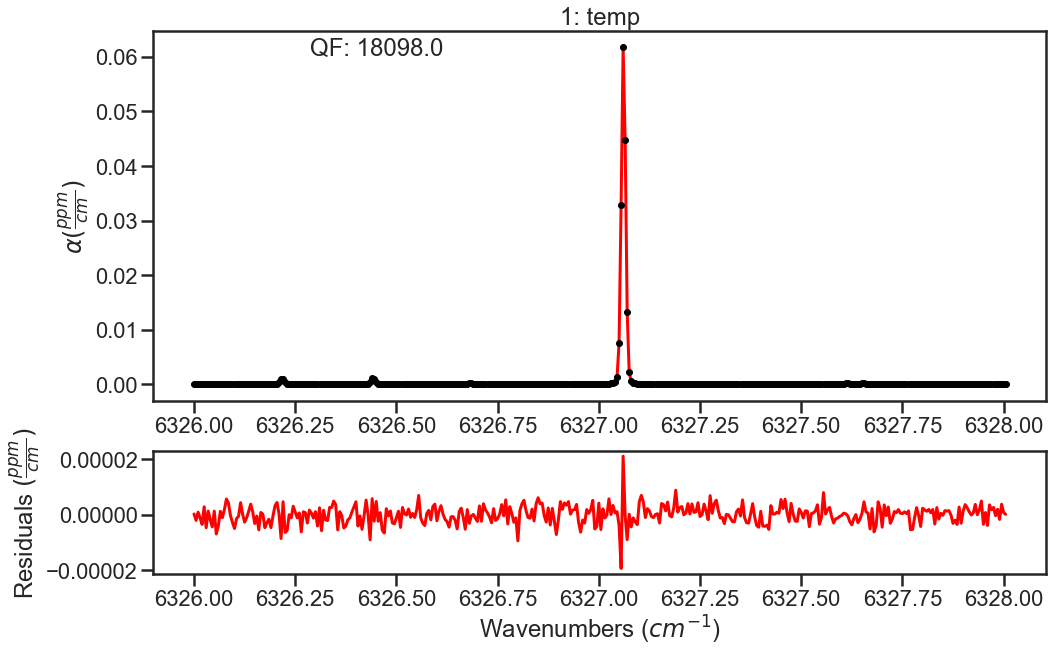

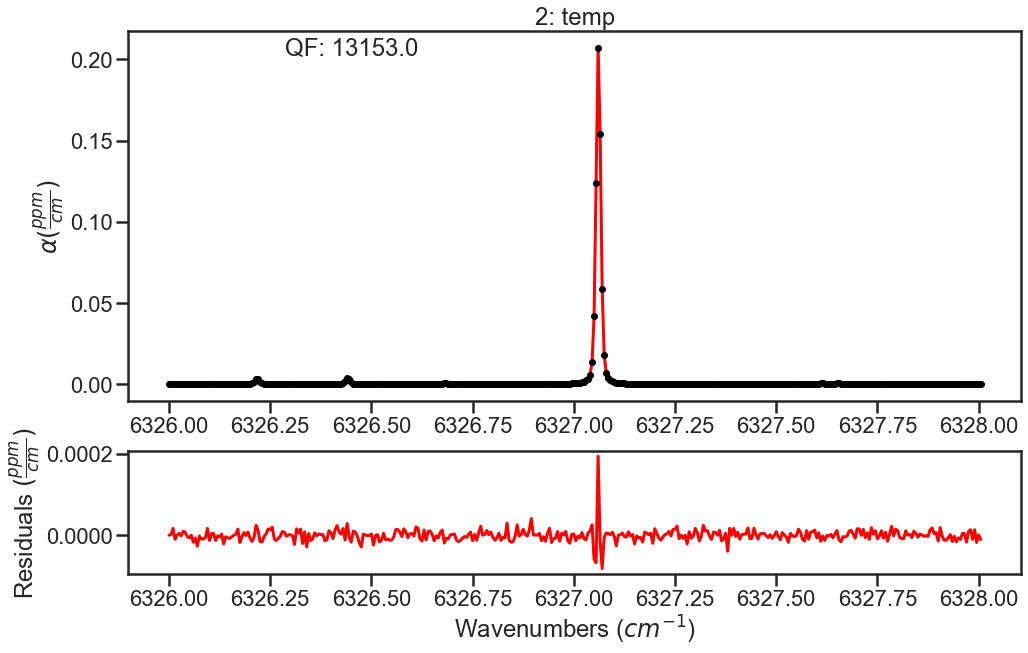

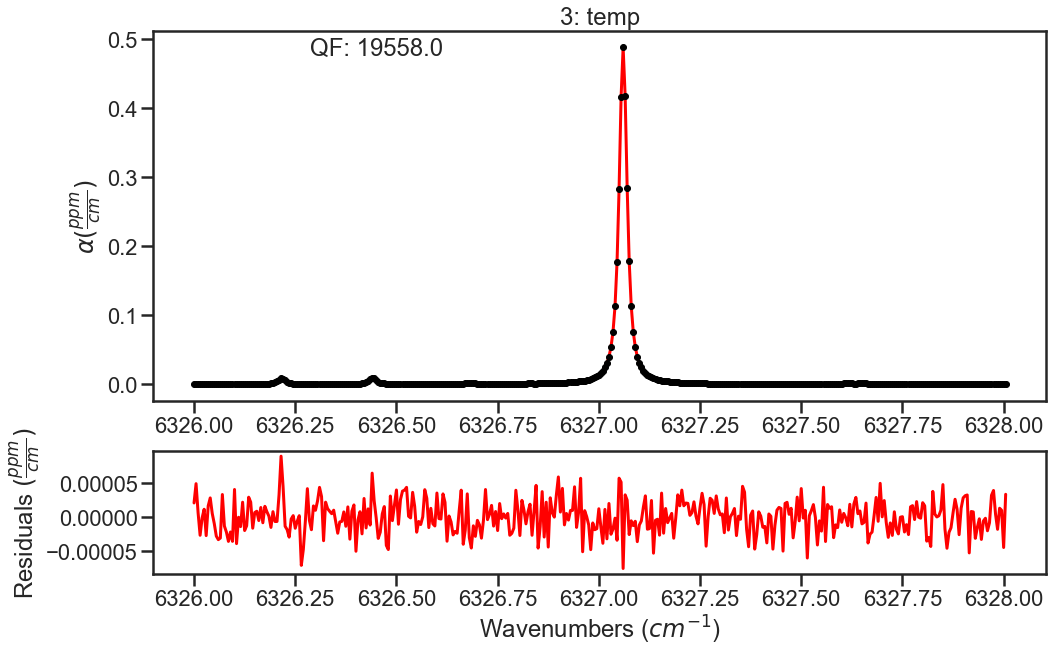

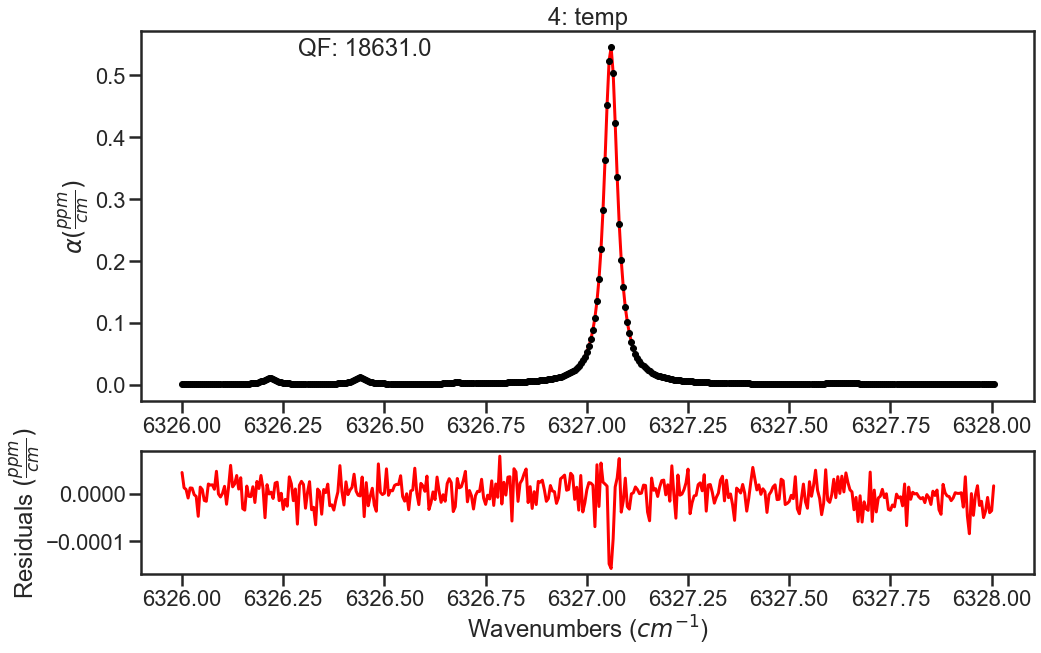

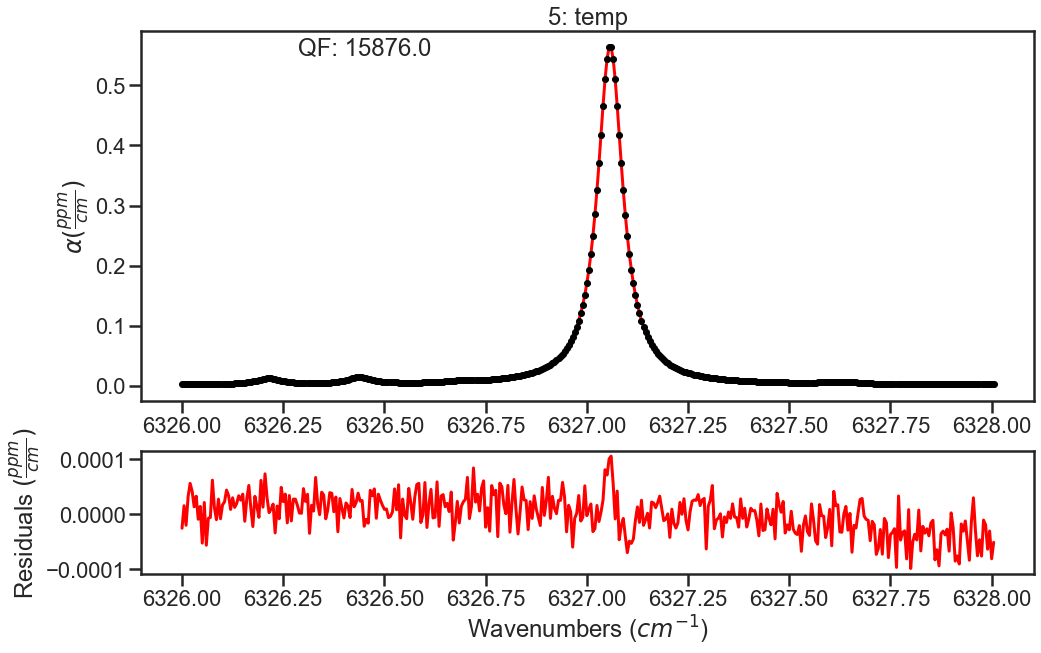

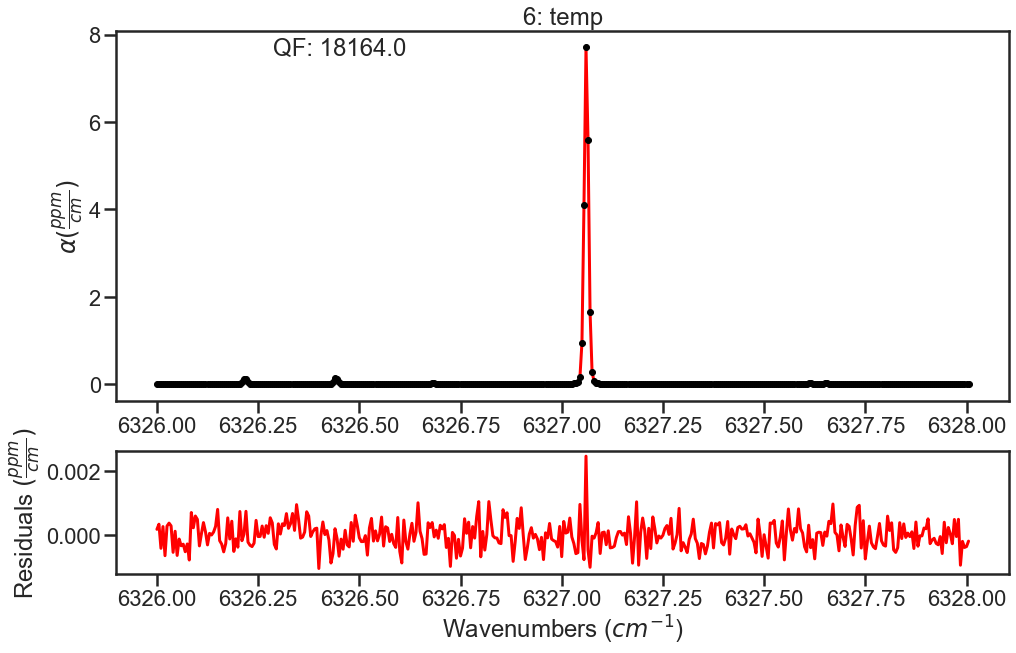

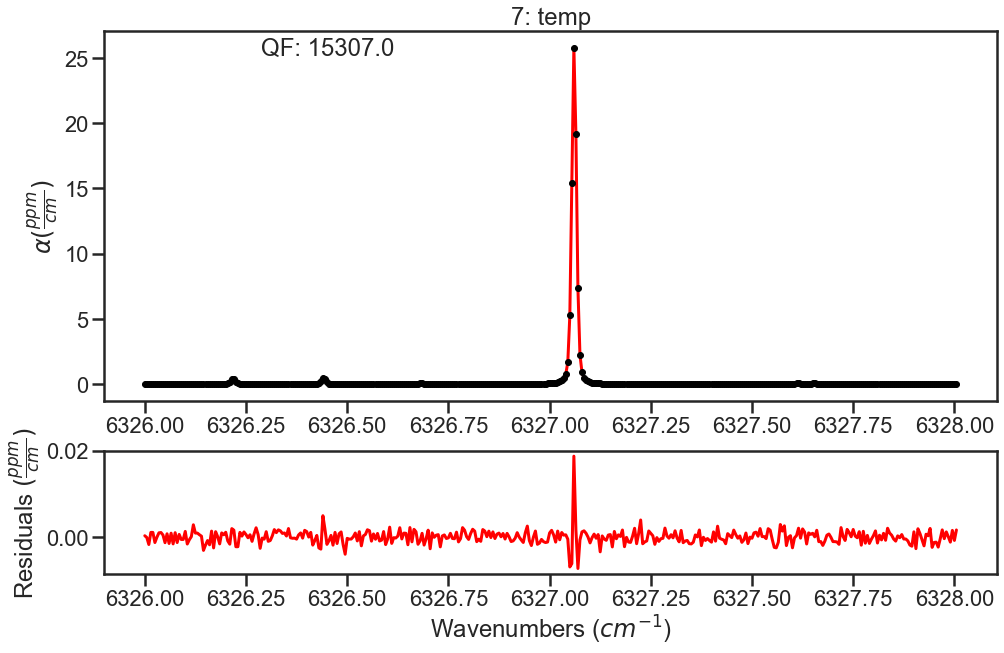

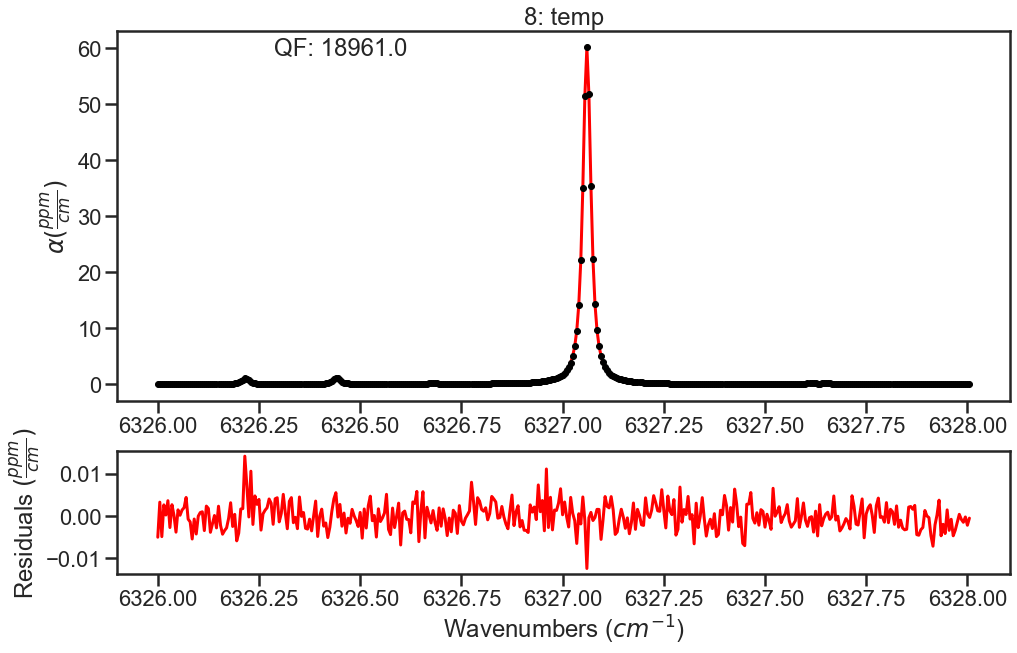

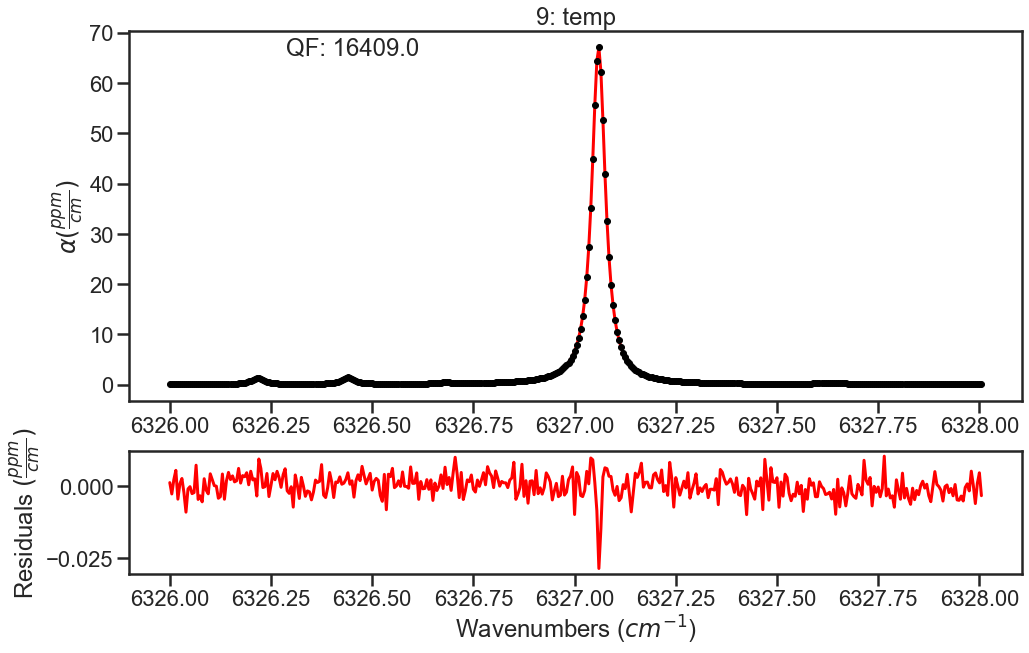

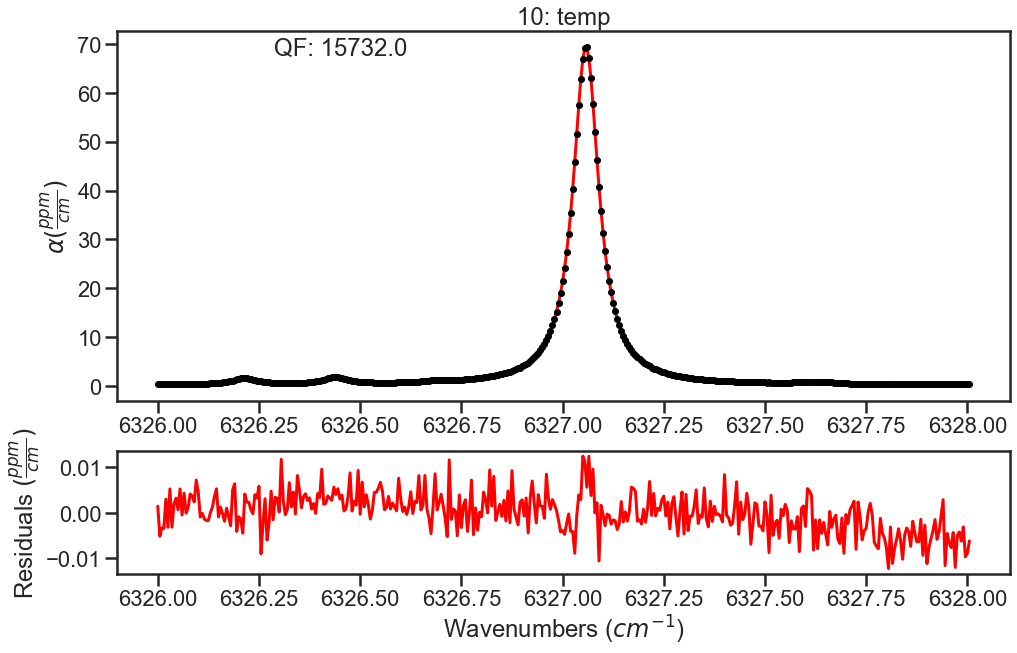

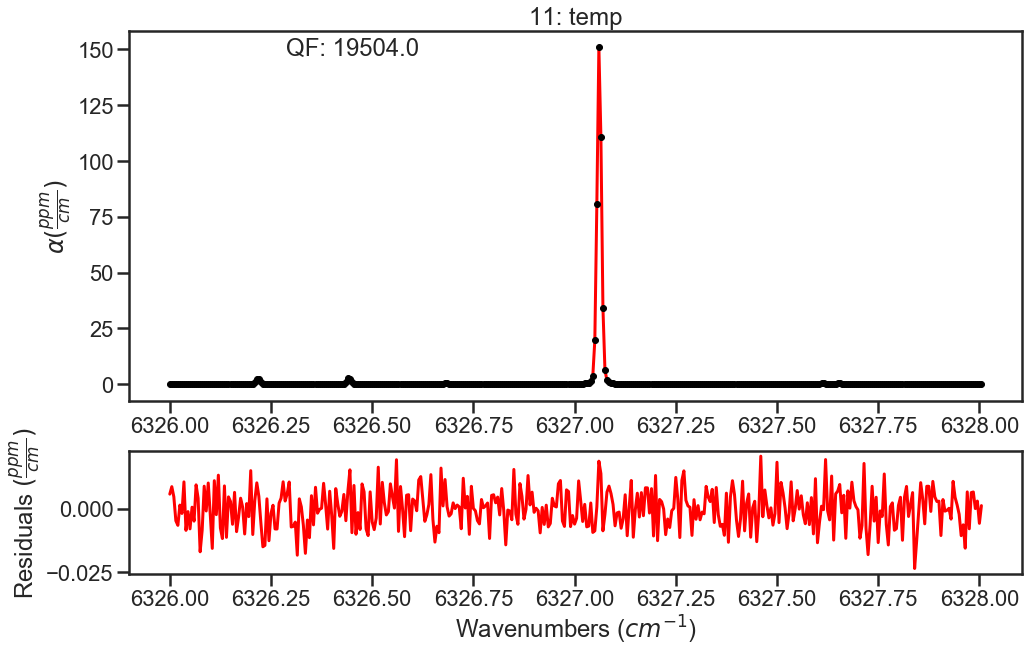

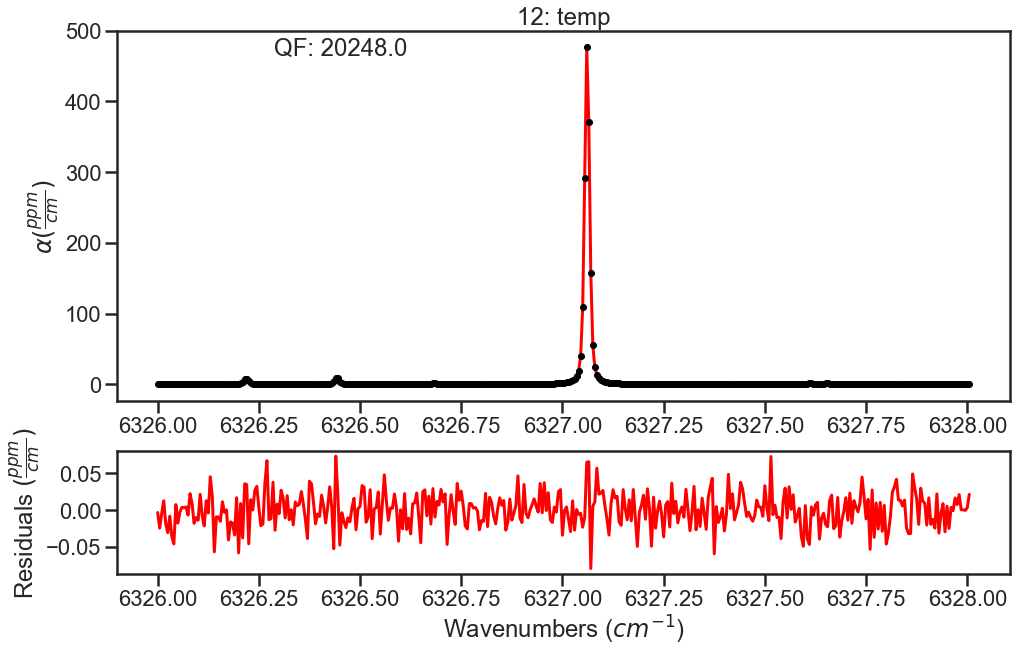

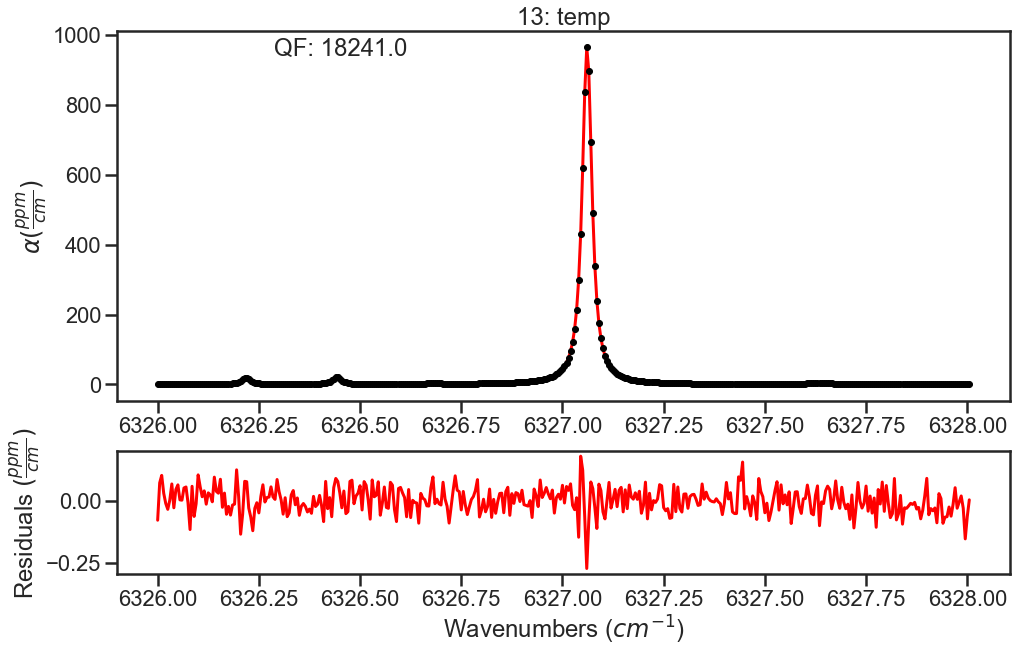

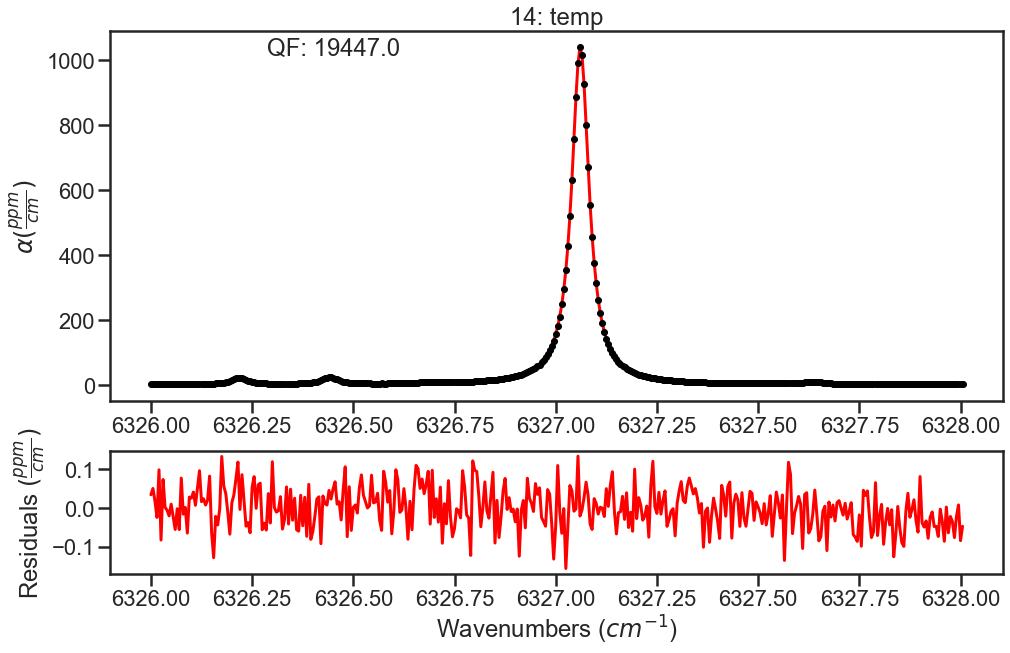

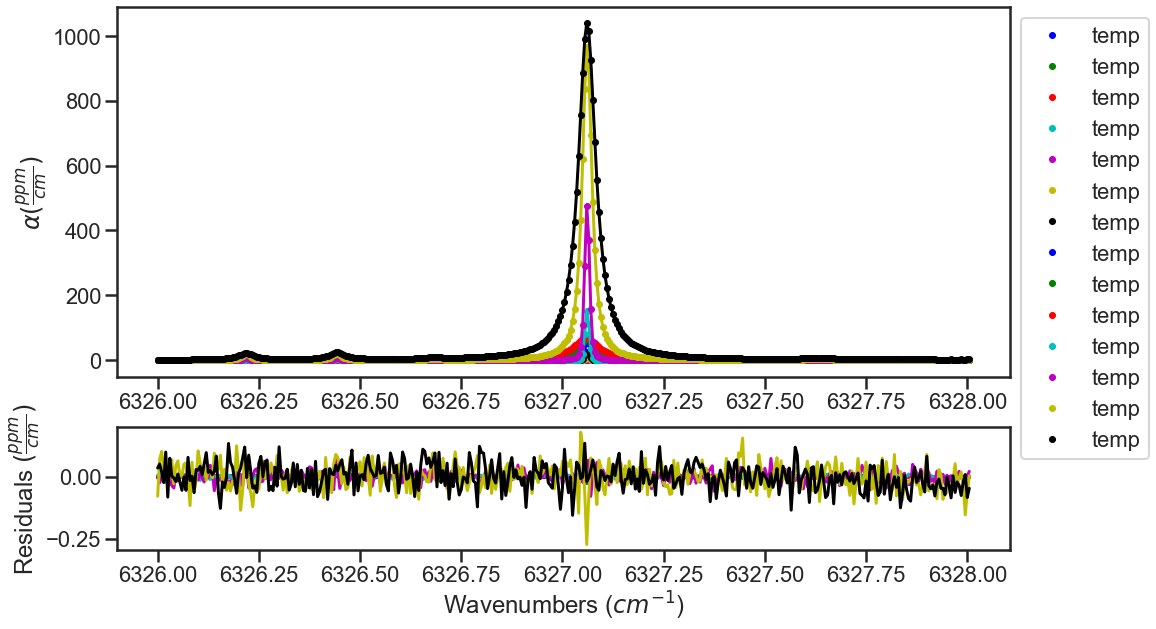

In [5]:
# Do an initial fit without using the beta formalism.  Note that over this pressure range there is a nuVC value what was able to generate a reasonable solution across all pressures.  However there tend to be systematic residuals at low pressures.  

os.chdir(path)   
fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', minimum_parameter_fit_intensity = 1e-24, 
                      beta_formalism = False)
params = fit_data.generate_params()
result = fit_data.fit_data(params, wing_cutoff = 25,wing_method = 'wing_wavenumbers')
print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result, param_linelist_update_file = 'Results without Beta')
SPECTRA.generate_summary_file(save_file = True)
SPECTRA.plot_model_residuals()



Name                       Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_10_0             0.5263     -inf      inf        0    False     None     None
Pressure_11_0           0.006579     -inf      inf        0    False     None     None
Pressure_12_0            0.02632     -inf      inf        0    False     None     None
Pressure_13_0             0.1316     -inf      inf        0    False     None     None
Pressure_14_0             0.2632     -inf      inf        0    False     None     None
Pressure_1_0            0.006579     -inf      inf        0    False     None     None
Pressure_2_0             0.02632     -inf      inf        0    False     None     None
Pressure_3_0              0.1316     -inf      inf        0    False     None     None
Pressure_4_0              0.2632     -inf      inf        0    False     None     None
Pressure_5_0              0.5263     -inf      inf        0    False     None     None
Pressure_6_0            0.006579     -inf

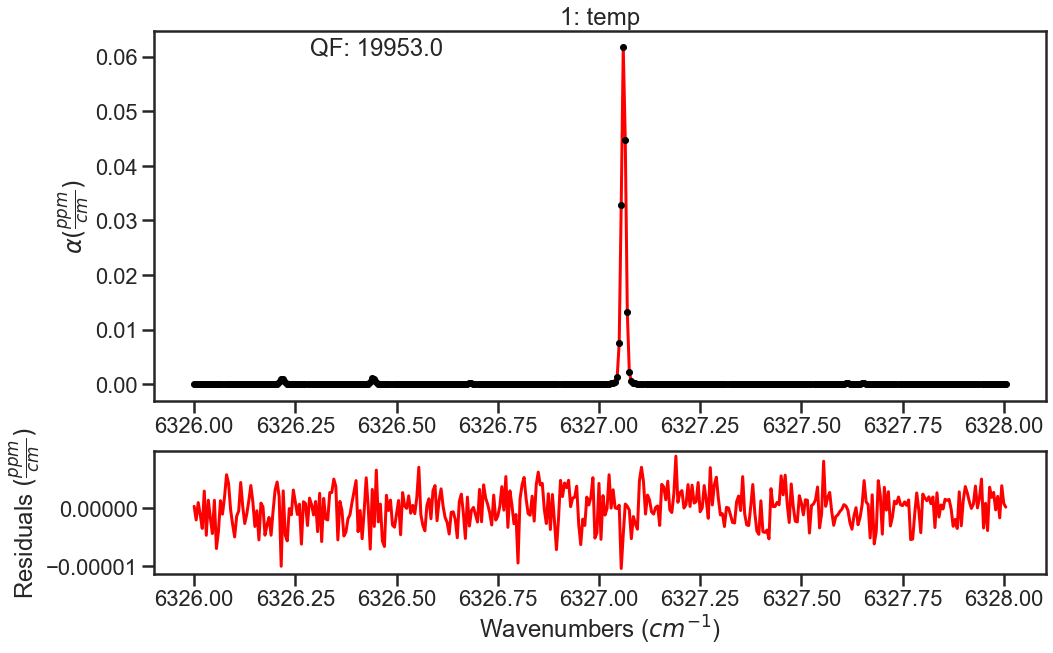

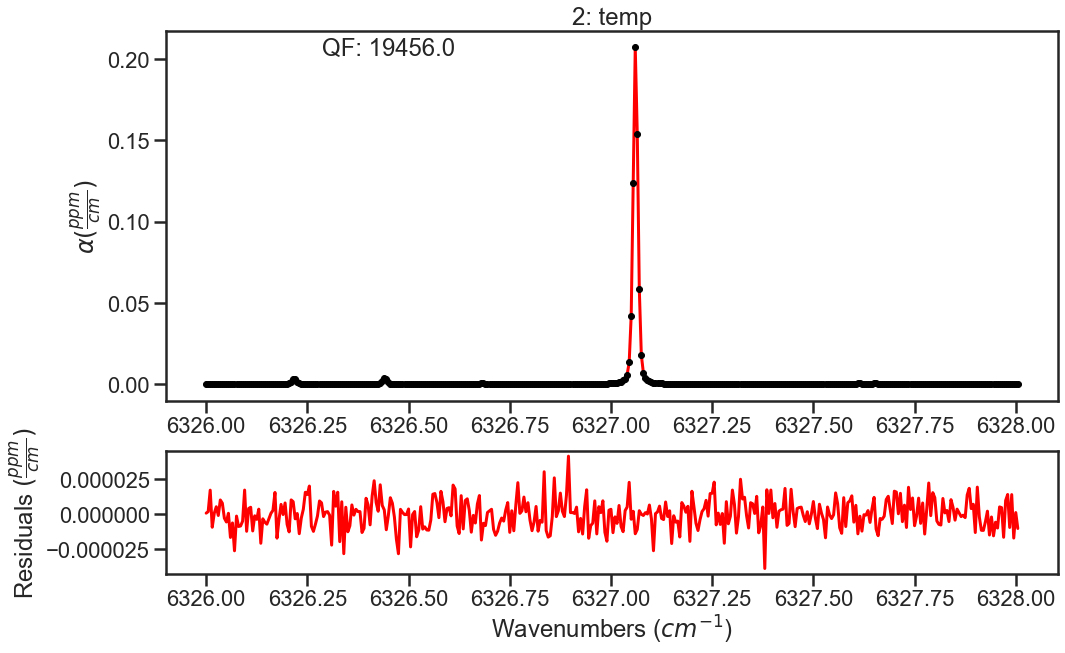

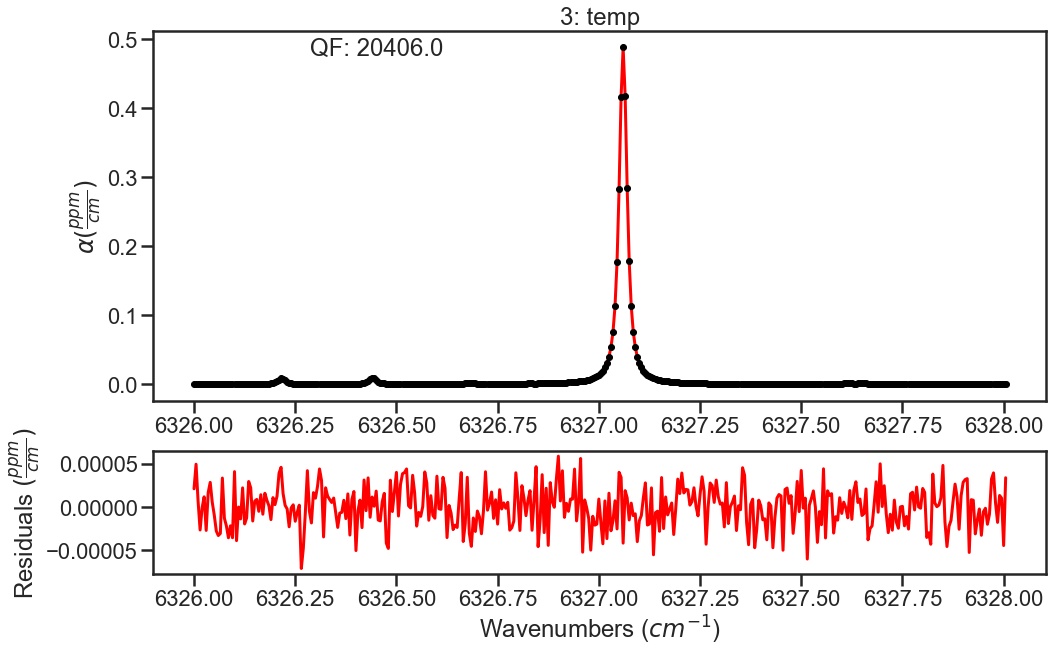

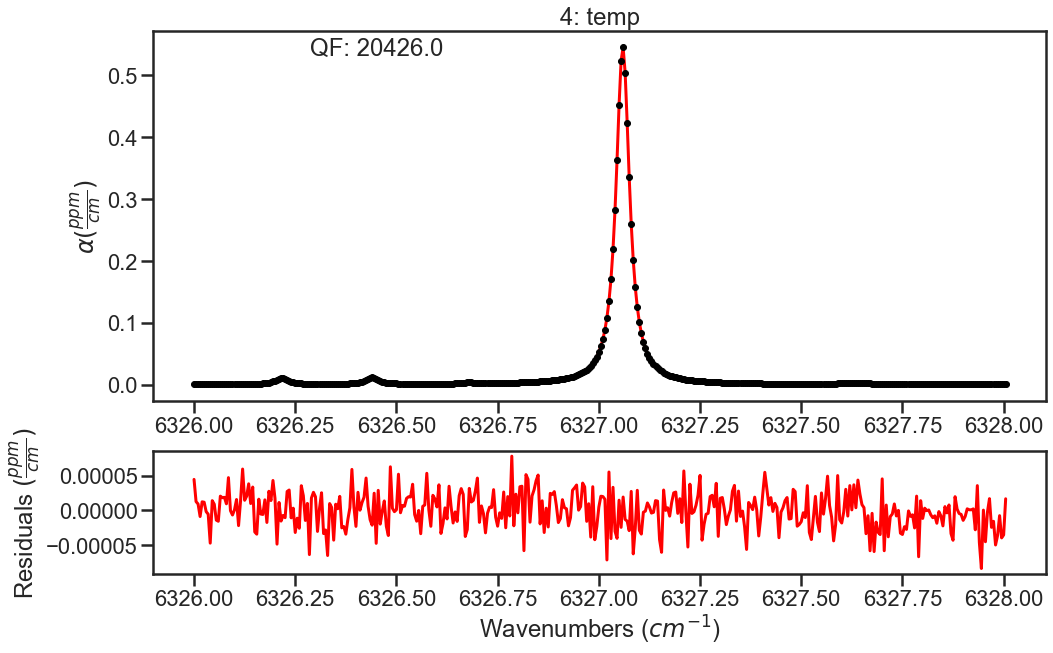

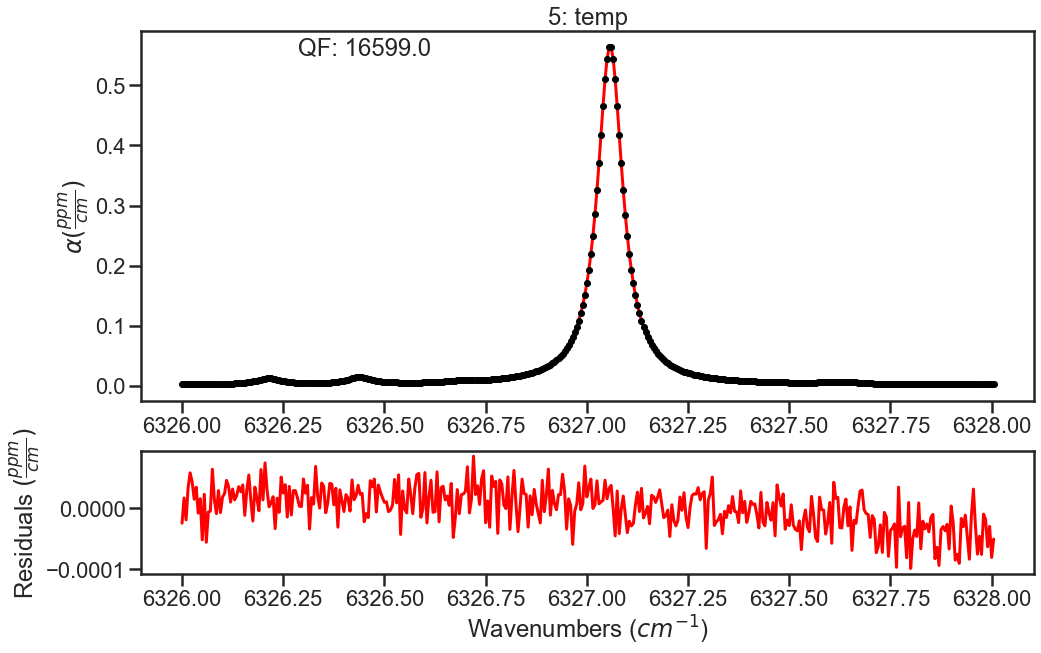

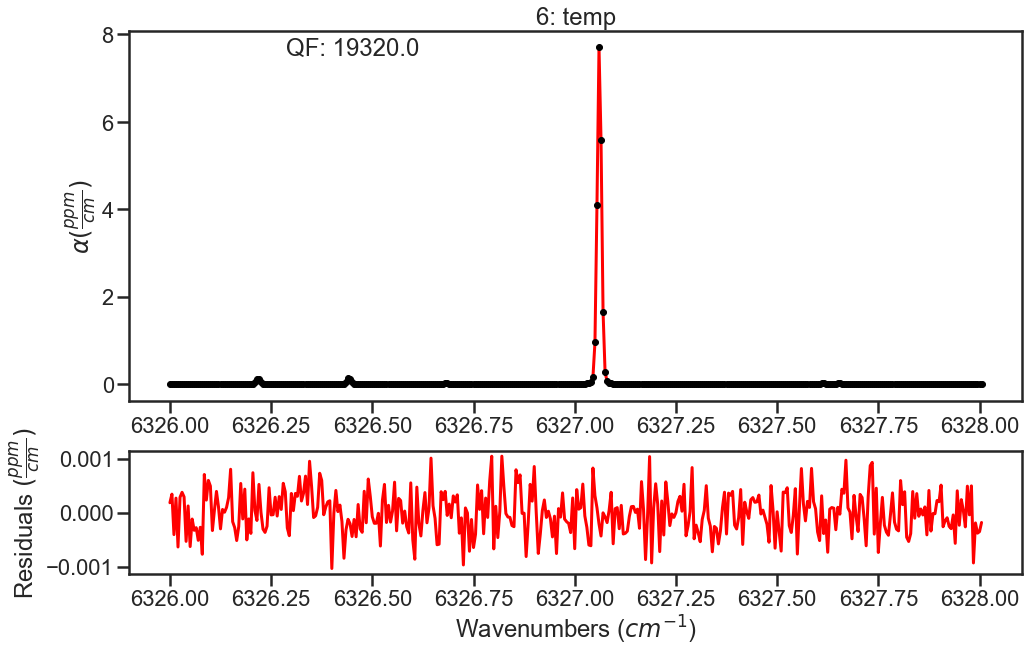

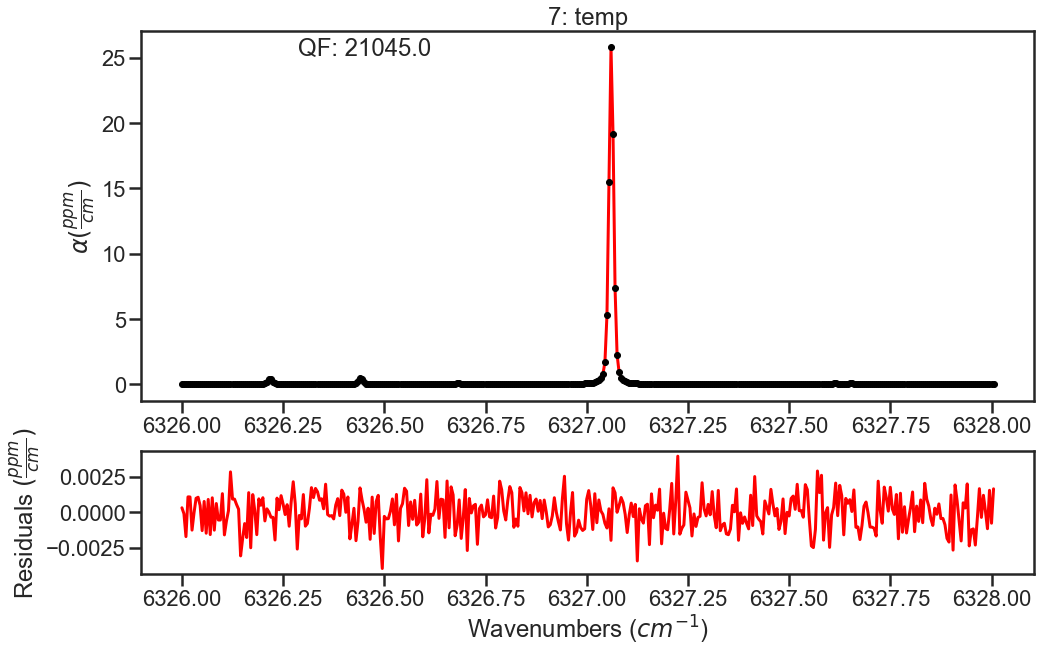

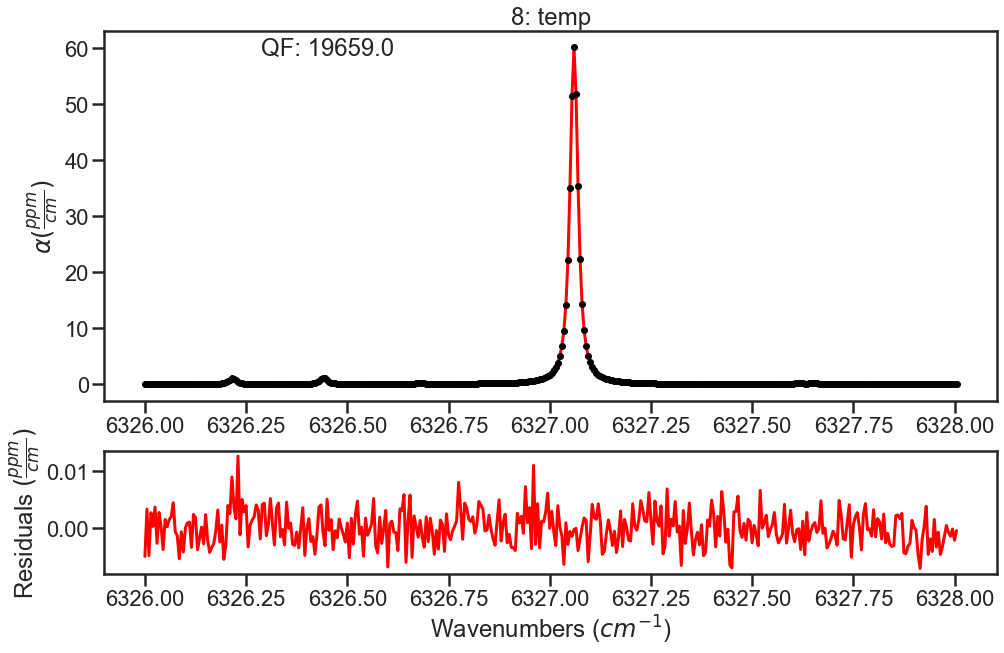

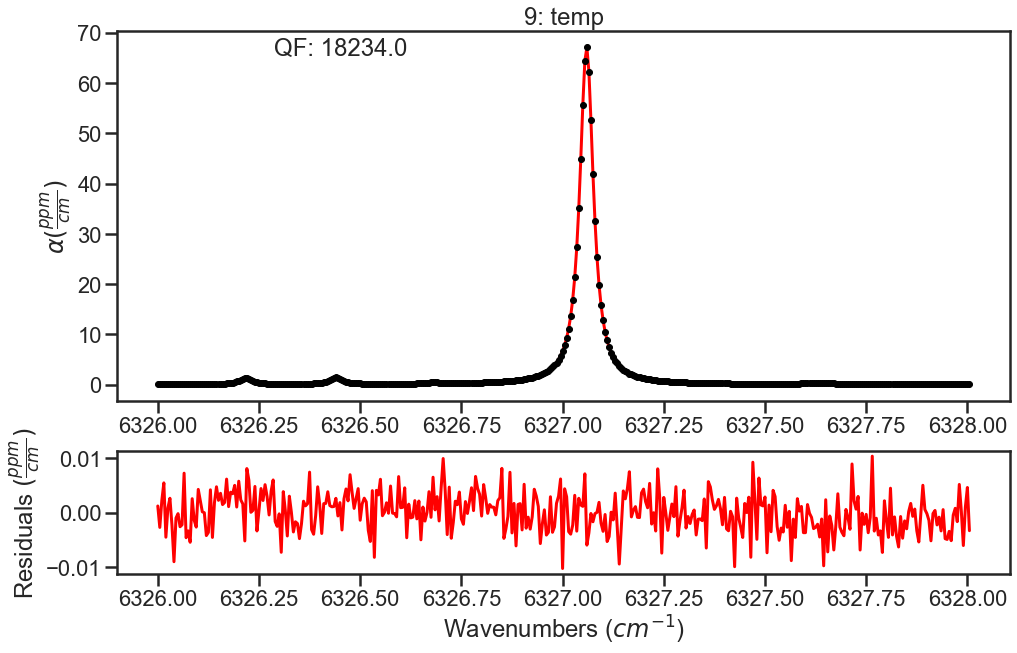

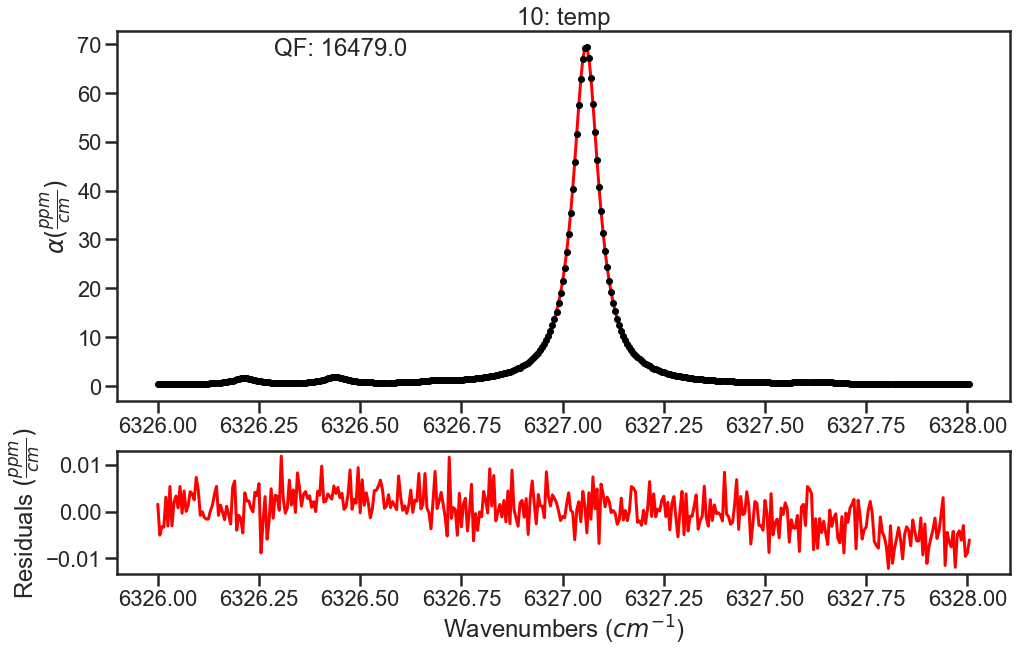

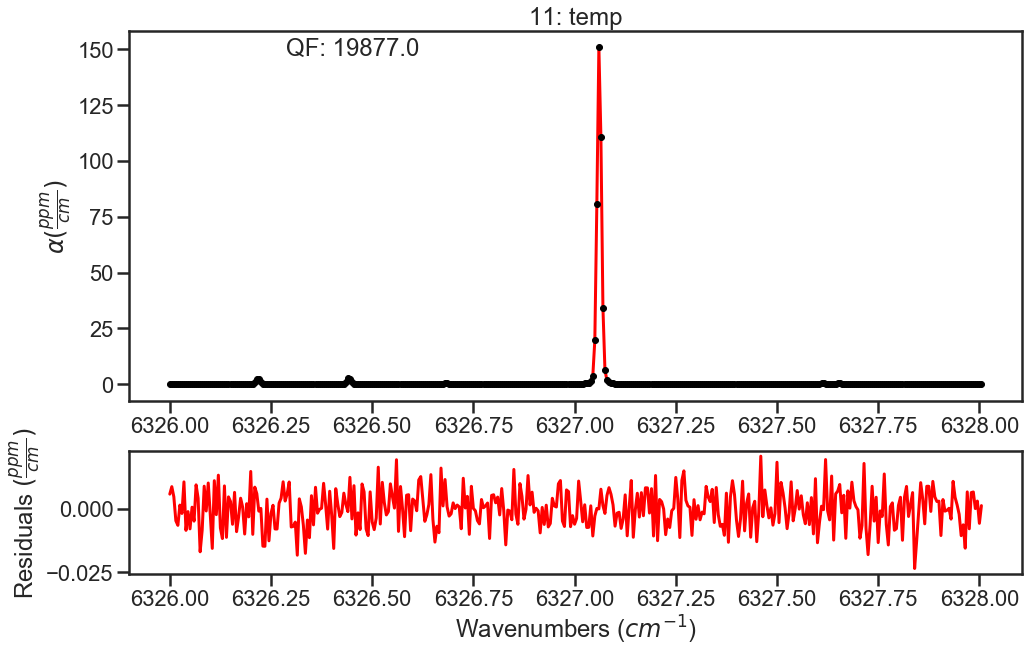

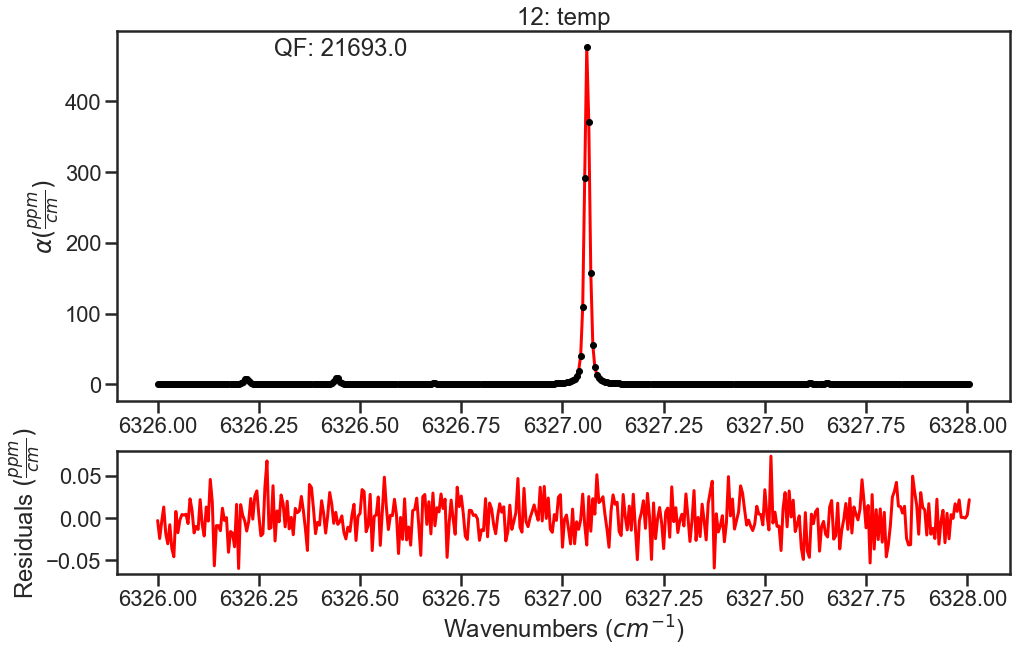

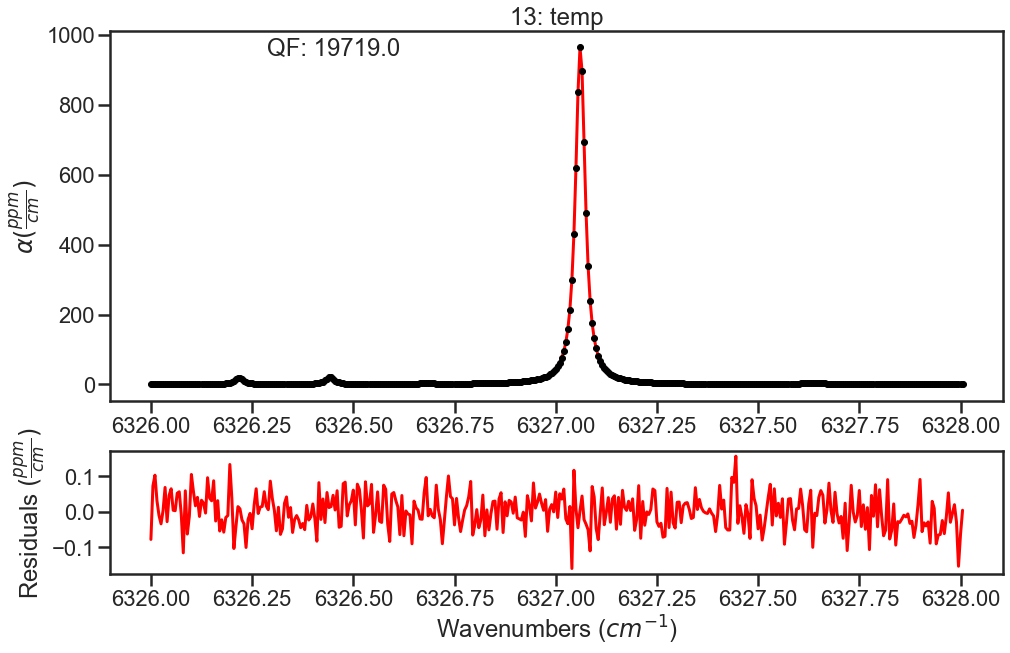

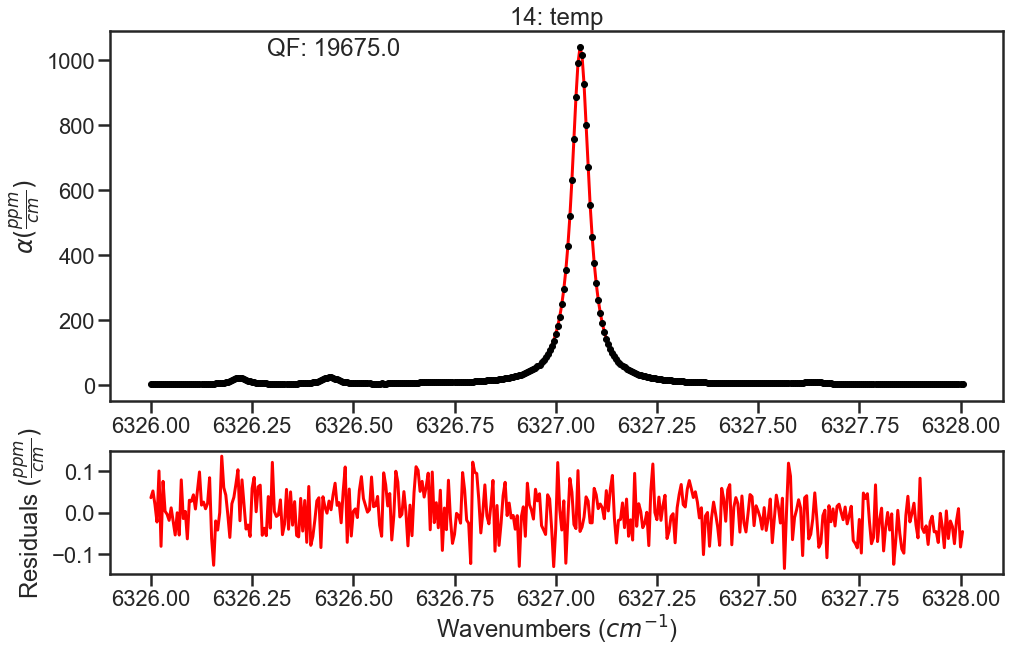

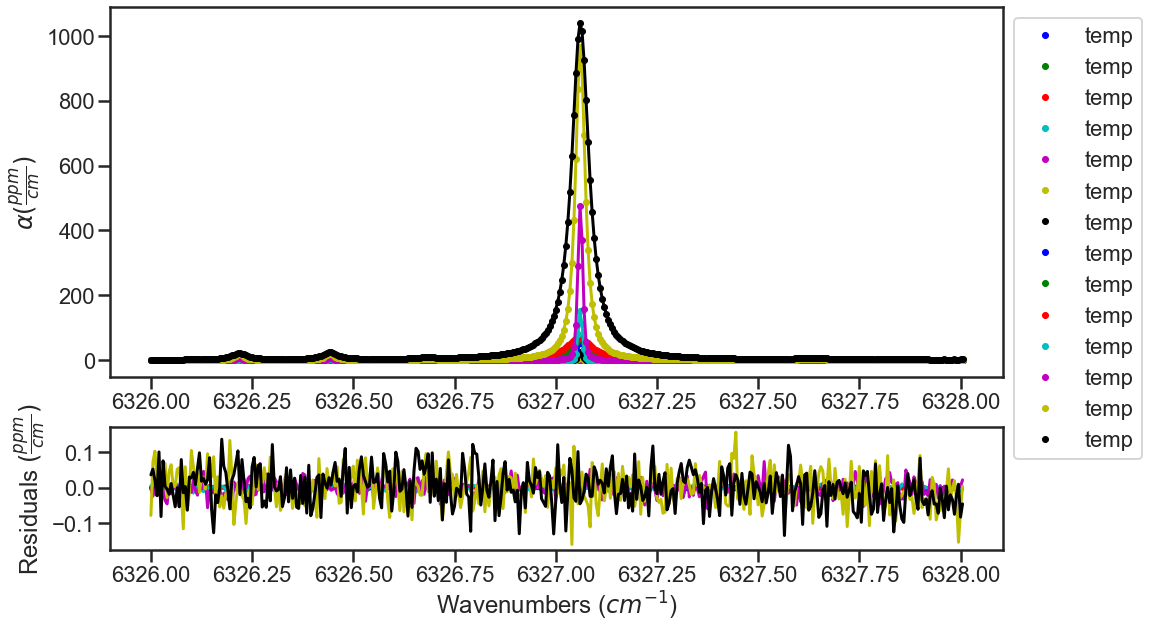

C:\Users\ema3\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
#Unsuprisingly, using the beta correction gives better results as that was what the spectra were simualted at.  NOte that if the nuVC initial guess was at optimum value without the beta correction that you might be at a local minima that the beta formalism still had systematic residuals.  
os.chdir(path)   
fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', minimum_parameter_fit_intensity = 1e-24, 
                      beta_formalism = True)
params = fit_data.generate_params()
result = fit_data.fit_data(params, wing_cutoff = 25,wing_method = 'wing_wavenumbers')
print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)
SPECTRA.plot_model_residuals()
fit_data.generate_beta_output_file()
